# Perceptron Algorithm
### Conding the Perceptron Algorithm
Time to code! In this exercise, we'll have the chance to implement the perceptron algorithm to separate the following data (given in the file perceptron.csv).
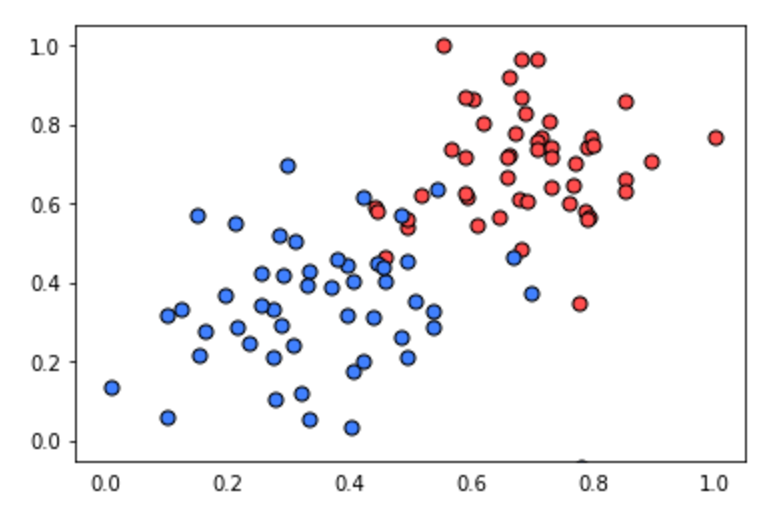
Recall that the perceptron step works as follows. For a point with coordinates $(p,q)$, label $y$, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$:
* If the point is correctly classified, do nothing.
* If the point is classified positive, but it has a negative label, substract $\alpha{p}$,$\alpha{q}$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.
* If the point is classified negative, but is has a positive label, add $\alpha{p}$, $\alpha{q}$, and $\alpha$ to $w_1$, $w_2$, and $b$ respectively.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing off the initial parameters) to see how the initial conditions can affect the solution.

In [1]:
import numpy as np

In [2]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [3]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [4]:
# The code below implements the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_pred = prediction(X[i], W, b)
        if y[i]-y_pred ==1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
        elif y[i]-y_pred == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            
    return W, b

In [5]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [6]:
boundary = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)

NameError: name 'X' is not defined